# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [5]:
# Import the local development version
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

# Import directly from the module to avoid conflicts with installed package
from brayam_pineda_ml import WeatherDataProcessor
import pandas as pd
import numpy as np

ImportError: cannot import name 'WeatherDataProcessor' from 'brayam_pineda_ml' (c:\Users\Brayam Pineda\anaconda3\envs\aml-assignment-2\Lib\site-packages\brayam_pineda_ml\__init__.py)

In [5]:
# Test the import
print("✅ WeatherDataProcessor imported successfully!")
print(f"Available methods: {[method for method in dir(WeatherDataProcessor) if not method.startswith('_')]}")


✅ WeatherDataProcessor imported successfully!


NameError: name 'WeatherDataProcessor' is not defined

## Using the New Library for Data Processing

Instead of manually processing the data, we can now use the WeatherDataProcessor library:


In [ ]:
# Initialize the weather data processor
processor = WeatherDataProcessor(
    lat=-33.8678,  # Sydney latitude
    lon=151.2073,  # Sydney longitude
    timezone="Australia/Sydney"
)

# Run the complete pipeline for classification (rain prediction)
data = processor.process_full_pipeline(
    start_date="2016-01-01",
    end_date="2024-12-31",
    task_type="classification",
    target_name="target_rain"
)

print("✅ Data processing complete!")
print(f"Training set: {data['X_train'].shape}")
print(f"Validation set: {data['X_val'].shape}")
print(f"Test set: {data['X_test'].shape}")
print(f"Number of features: {len(data['feature_names'])}")
print(f"Target variable: {data['target_name']}")
print(f"Class distribution: {data['y_train'].value_counts().to_dict()}")


In [ ]:
# <Student to fill this section>
# Core Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and API
import requests

# Machine Learning - Core
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import (
    RandomizedSearchCV, 
    PredefinedSplit, 
    train_test_split, 
    cross_val_score, 
    TimeSeriesSplit
)
from sklearn.metrics import (
    roc_auc_score, 
    average_precision_score, 
    f1_score, 
    accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    VotingClassifier
)
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer

# Machine Learning - Advanced
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Visualization and Analysis
from pandas.plotting import autocorrelation_plot, lag_plot

# Utilities
import warnings

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Brayam Alexander Pineda Miranda"
student_id = "25587799"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [7]:
# <Student to fill this section>
business_use_case_description = """
The goal of the project is to provide a reliable predictive model that determines whether it will rain in Sydney exactly seven days ahead. For the business, this translates into actionable insights that support planning and resource allocation. Accurate forecasts of rain events a week in advance help mitigate operational risks, reduce unnecessary costs, and improve decision-making in areas such as logistics, event planning, and resource management. The model’s value lies in its ability to anticipate conditions that directly affect customer satisfaction, efficiency, and safety.
"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [9]:
# <Student to fill this section>
business_objectives = """
Accurate results will allow the business to anticipate rain with confidence, leading to better scheduling, reduced weather-related disruptions, and improved allocation of resources. This increases efficiency and strengthens trust in the forecasts as a decision-making tool. Incorrect results, on the other hand, carry tangible costs: false positives may lead to unnecessary cancellations or over-preparation, while false negatives expose the business to operational risks, losses, and reputational damage due to unanticipated rain events.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [11]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results will be used as an input for planning and operational decisions where rain risk directly affects outcomes. The primary users of the predictions will be managers and planners in sectors such as logistics, outdoor event coordination, and resource allocation. Secondary users include operational teams who must act on the forecast, such as staff scheduling or equipment deployment. The predictions will also impact end customers and participants, as accurate forecasts reduce disruptions and improve service reliability.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [13]:
# <Student to fill this section>
import requests
import pandas as pd

# Sydney coordinates
LAT, LON = -33.8678, 151.2073
TZ = "Australia/Sydney"

# Date range (only up to 2024 for training/validation)
START, END = "2016-01-01", "2024-12-31"

# Daily variables to collect
DAILY_VARS = [
    "weather_code",
    "temperature_2m_max", "temperature_2m_min",
    "apparent_temperature_max", "apparent_temperature_min",
    "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours",
    "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant",
    "shortwave_radiation_sum", "et0_fao_evapotranspiration",
    "sunshine_duration", "daylight_duration"
]

# Build URL
url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={LAT}&longitude={LON}"
    f"&start_date={START}&end_date={END}"
    f"&daily={','.join(DAILY_VARS)}"
    f"&timezone={TZ}"
)

# Fetch
response = requests.get(url)
response.raise_for_status()
data_rain = response.json()

# Convert to DataFrame
data_rain = pd.DataFrame(data_rain["daily"])
data_rain["time"] = pd.to_datetime(data_rain["time"]).dt.date


In [14]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         3288 non-null   object 
 1   weather_code                 3288 non-null   int64  
 2   temperature_2m_max           3288 non-null   float64
 3   temperature_2m_min           3288 non-null   float64
 4   apparent_temperature_max     3288 non-null   float64
 5   apparent_temperature_min     3288 non-null   float64
 6   precipitation_sum            3288 non-null   float64
 7   rain_sum                     3288 non-null   float64
 8   snowfall_sum                 3288 non-null   float64
 9   precipitation_hours          3288 non-null   float64
 10  wind_speed_10m_max           3288 non-null   float64
 11  wind_gusts_10m_max           3288 non-null   float64
 12  wind_direction_10m_dominant  3288 non-null   int64  
 13  shortwave_radiatio

### C.2 Define Target variable

In [15]:
# <Student to fill this section>
import pandas as pd

# shift rain_sum by -7 days to get future rainfall
data_rain = data_rain.sort_values("time").reset_index(drop=True)
data_rain["rain_in_7d"] = data_rain["rain_sum"].shift(-7)

# apply threshold to create binary target
data_rain["target_rain"] = (data_rain["rain_in_7d"] > 0.1).astype(int)

# drop rows with no future info (last 7 days)
data_rain = data_rain.dropna(subset=["rain_in_7d"]).reset_index(drop=True)

data_rain[["time", "rain_sum", "rain_in_7d", "target_rain"]].head(10)


,time,rain_sum,rain_in_7d,target_rain
0,2016-01-01,0.0,0.0,0
1,2016-01-02,0.0,0.0,0
2,2016-01-03,1.3,0.0,0
3,2016-01-04,15.6,1.3,1
4,2016-01-05,52.3,0.6,1
5,2016-01-06,41.2,0.0,0
6,2016-01-07,0.7,6.5,1
7,2016-01-08,0.0,18.0,1
8,2016-01-09,0.0,0.7,1
9,2016-01-10,0.0,0.0,0


In [16]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         3281 non-null   object 
 1   weather_code                 3281 non-null   int64  
 2   temperature_2m_max           3281 non-null   float64
 3   temperature_2m_min           3281 non-null   float64
 4   apparent_temperature_max     3281 non-null   float64
 5   apparent_temperature_min     3281 non-null   float64
 6   precipitation_sum            3281 non-null   float64
 7   rain_sum                     3281 non-null   float64
 8   snowfall_sum                 3281 non-null   float64
 9   precipitation_hours          3281 non-null   float64
 10  wind_speed_10m_max           3281 non-null   float64
 11  wind_gusts_10m_max           3281 non-null   float64
 12  wind_direction_10m_dominant  3281 non-null   int64  
 13  shortwave_radiatio

In [17]:
# <Student to fill this section>
target_definition_explanations = """
The target variable was defined as a binary indicator of rain occurrence seven days after the observation date, using `rain_sum > 0.1mm` as the threshold. This choice reflects the business goal of predicting whether it will rain, not how much, ensuring the model output is directly actionable for planning purposes. The seven-day shift aligns with the requirement to anticipate conditions a week in advance, while the threshold filters out trace amounts that have no operational impact. This design keeps the prediction relevant, practical, and consistent with the decision-making needs of stakeholders.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [19]:
# <Student to fill this section>

target_name = 'target_rain'

### C.4 Explore Target variable

In [20]:
# <Student to fill this section>

import pandas as pd
import matplotlib.pyplot as plt


df = data_rain.copy()
df["time"] = pd.to_datetime(df["time"])

# === 1. Distribution of classes ===
class_counts = df["target_rain"].value_counts()
class_percent = df["target_rain"].value_counts(normalize=True) * 100
print("Target variable distribution:")
print(pd.DataFrame({"Count": class_counts, "Percentage": class_percent.round(2)}))

Target variable distribution:
             Count  Percentage
target_rain                   
1             1682       51.26
0             1599       48.74


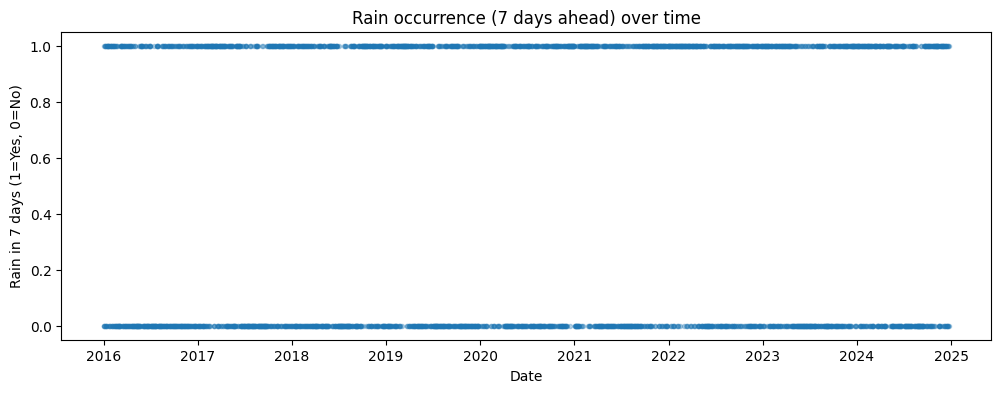

In [21]:
plt.figure(figsize=(12,4))
plt.plot(df["time"], df["target_rain"], ".", alpha=0.3)
plt.title("Rain occurrence (7 days ahead) over time")
plt.xlabel("Date")
plt.ylabel("Rain in 7 days (1=Yes, 0=No)")
plt.show()

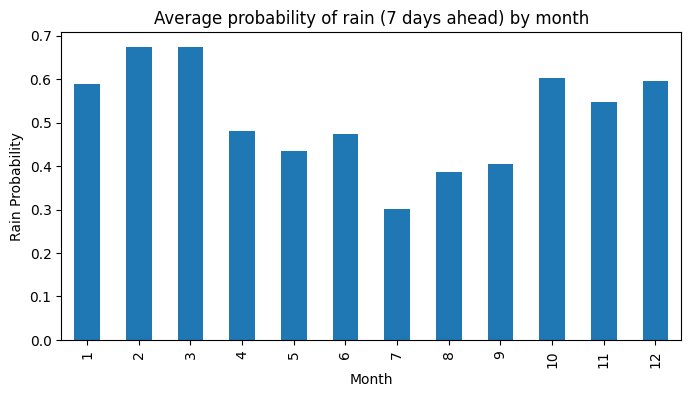

In [22]:
df["month"] = df["time"].dt.month
monthly_avg = df.groupby("month")["target_rain"].mean()

plt.figure(figsize=(8,4))
monthly_avg.plot(kind="bar")
plt.title("Average probability of rain (7 days ahead) by month")
plt.ylabel("Rain Probability")
plt.xlabel("Month")
plt.show()

In [23]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable shows a moderate class imbalance, with rain days more frequent 
than no-rain days. Clear seasonal patterns appear, with higher rain probability in 
early and late months of the year, and fewer events mid-year. While this aligns with 
Sydney’s climate, the binary definition ignores rainfall intensity and the 7-day 
forecast horizon increases uncertainty, which must be considered in modeling.
"""

In [24]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `continue variables`

In [25]:
# <Student to fill this section>

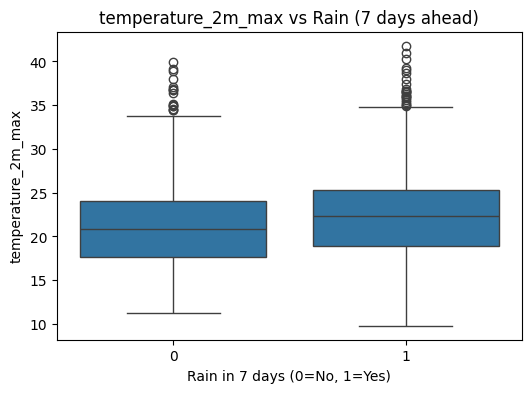

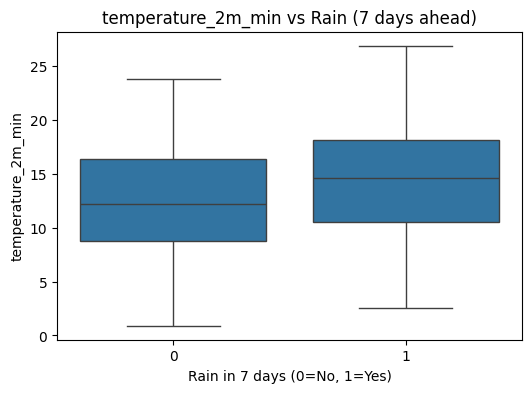

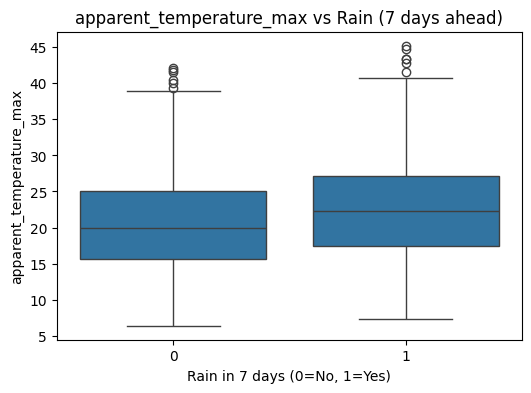

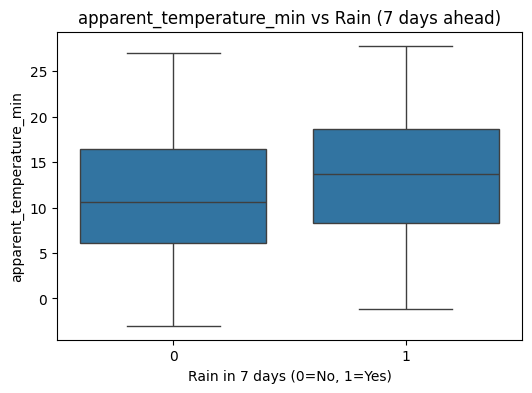

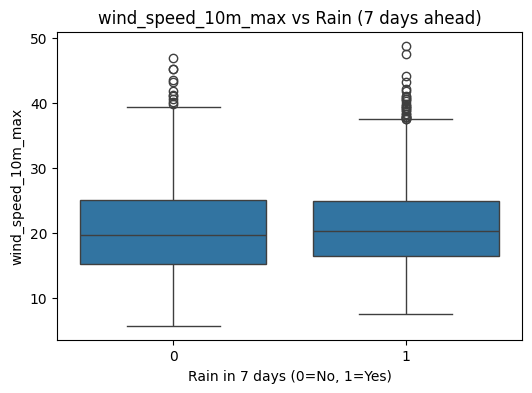

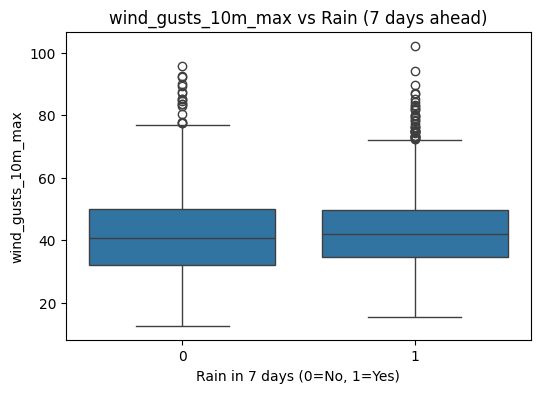

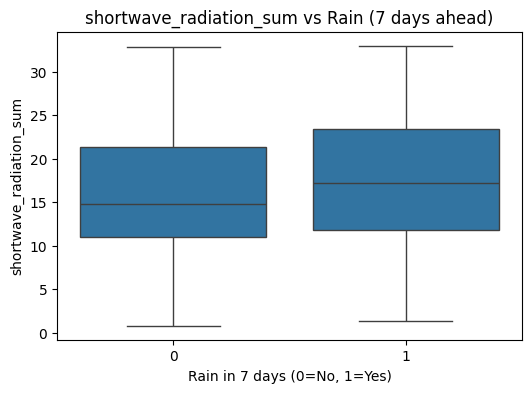

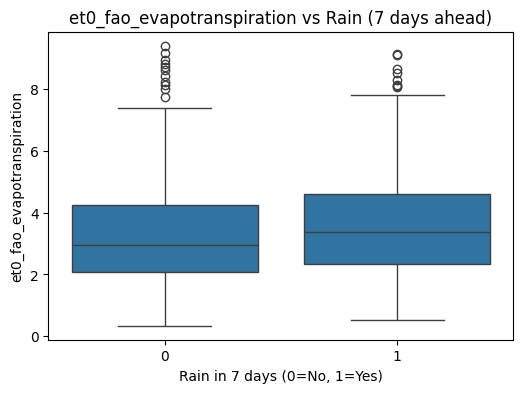

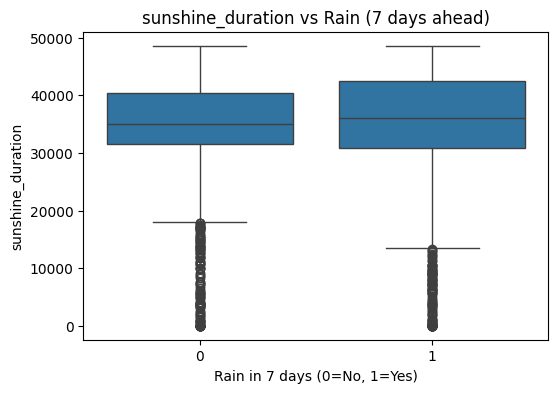

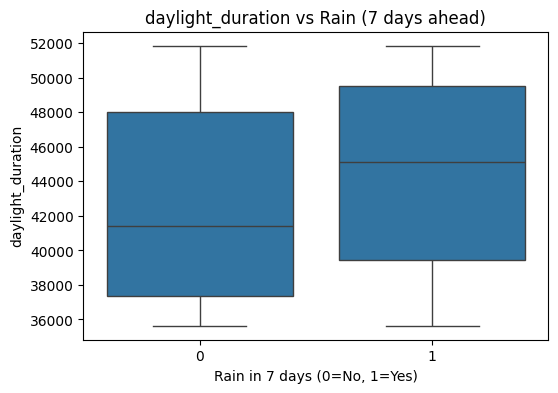

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df["target_rain"] = df["target_rain"].astype("category")

# === 1. Boxplots for continuous features ===
continuous_vars = [
    "temperature_2m_max", "temperature_2m_min",
    "apparent_temperature_max", "apparent_temperature_min",
    "wind_speed_10m_max", "wind_gusts_10m_max",
    "shortwave_radiation_sum", "et0_fao_evapotranspiration",
    "sunshine_duration", "daylight_duration"
]

for col in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target_rain", y=col, data=df)
    plt.title(f"{col} vs Rain (7 days ahead)")
    plt.xlabel("Rain in 7 days (0=No, 1=Yes)")
    plt.ylabel(col)
    plt.show()

In [27]:
# <Student to fill this section>
feature_1_insights = """
Temperature Variables (min/max, apparent)
Days labeled with rain in 7 days tend to show slightly higher minimum and maximum temperatures compared to no-rain days. This suggests warmer conditions may precede rainfall, consistent with atmospheric instability. However, the overlap between distributions is substantial, limiting their predictive power in isolation. Outliers are present, especially for maximum temperatures, but they follow expected seasonal extremes rather than data errors.

Radiation and Sunshine Variables
Shortwave radiation and sunshine duration are marginally lower in the no-rain class and higher when rain is expected. This inverse relation reflects cloud cover dynamics, but the differences are not stark, which may weaken their individual signal. Sunshine duration also shows many outliers, highlighting days with unusually low values, possibly linked to heavy cloud or seasonal effects.

Daylight Duration
Daylight duration is more closely tied to seasonality than rainfall. Rain days tend to occur during longer daylight periods, which aligns with the rainy season coinciding with summer months. As a predictive feature, it may act more as a proxy for time of year than as a direct signal of rainfall.

Wind Speed and Gusts
Wind speed and gusts are slightly higher for rain-labeled days, reflecting stormy or unsettled weather conditions. However, distributions overlap heavily, and many extreme outliers exist. These features may contribute incremental predictive value when combined with other variables but are unlikely to be strong standalone predictors.

Evapotranspiration (et0_fao)
Evapotranspiration values are marginally higher on rain days, suggesting more active atmospheric moisture processes. The feature shows a wide range with numerous outliers, reflecting natural variability in energy and moisture exchange. Its predictive role is expected to be weak in isolation but useful in interaction with radiation and temperature.
"""

In [28]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `categorical data`

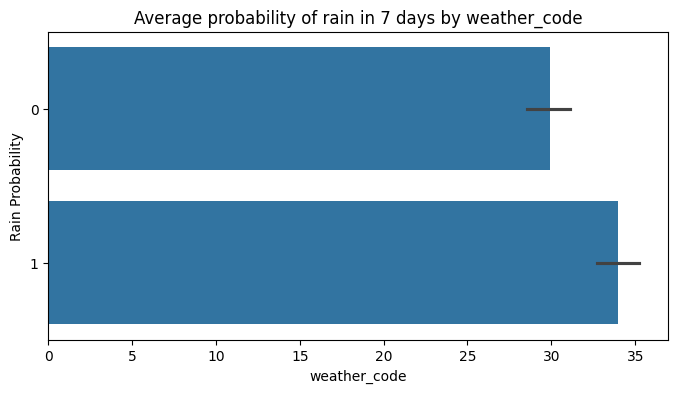

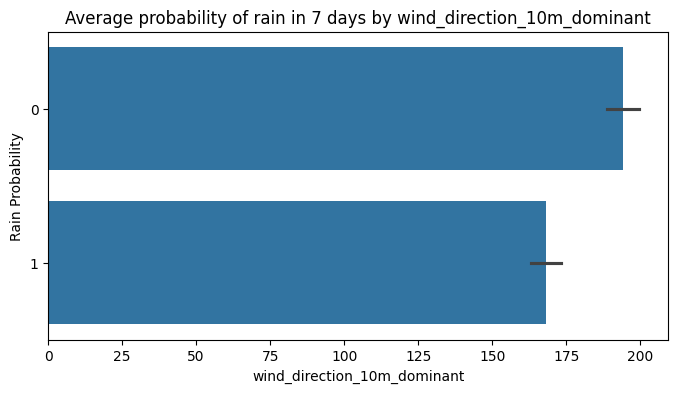

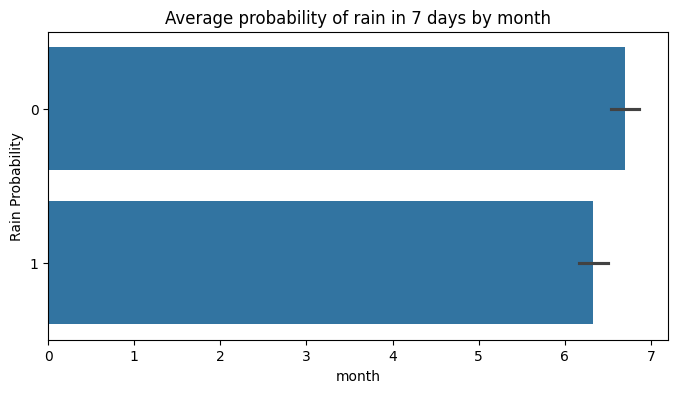

In [29]:
# <Student to fill this section>
categorical_vars = ["weather_code", "wind_direction_10m_dominant", "month"]

for col in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y="target_rain", data=df, estimator=lambda x: sum(x)/len(x))
    plt.title(f"Average probability of rain in 7 days by {col}")
    plt.ylabel("Rain Probability")
    plt.xlabel(col)
    plt.show()

In [30]:
# <Student to fill this section>
feature_2_insights = """
Weather Code
Weather codes display a clear separation between rain and no-rain cases. Days labeled as rain in seven days correspond more often to weather codes that indicate cloudier or unsettled conditions. This suggests that current atmospheric codes already embed valuable signals about upcoming precipitation. The limitation is that these codes are derived from short-term observations, so their predictive strength may weaken over a 7-day horizon.

Wind Direction
The dominant wind direction shows some variation between rain and no-rain groups, with rain days more frequently associated with particular directional ranges. This reflects the influence of prevailing wind systems on rainfall in Sydney. However, the differences are not very sharp, and direction alone may not provide strong predictive power without being combined with other meteorological features.

Month
Month is strongly associated with the probability of rain, showing a seasonal pattern consistent with Sydney’s climate. Early months of the year and late spring months exhibit higher probabilities of rainfall, while mid-year months show reduced likelihood. While useful as a seasonal proxy, month is a non-causal feature that risks making the model overly dependent on cyclical patterns, which may limit generalisation if climate anomalies occur.
"""

In [31]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

---
## D. Feature Selection


### D.1 Approach "\<describe_approach_here\>"


In [32]:
# <Student to fill this section>

In [33]:
features_keep = [
    # Temperature
    "temperature_2m_max", "temperature_2m_min",
    "apparent_temperature_max", "apparent_temperature_min",

    # Wind
    "wind_speed_10m_max", "wind_gusts_10m_max",

    # Radiation / sunshine / evapotranspiration
    "shortwave_radiation_sum", "sunshine_duration", "et0_fao_evapotranspiration",

    # Categorical / context
    "weather_code", "wind_direction_10m_dominant", 
    "time", "precipitation_sum", "rain_sum", "target_rain"
]

In [34]:
# <Student to fill this section>
feature_selection_1_insights = """
The approach to feature selection was guided by two principles: domain relevance and statistical signal. Meteorological variables such as temperature, wind, radiation, sunshine, and evapotranspiration were retained because they capture physical processes that precede rainfall, ensuring the model leverages meaningful predictors rather than spurious correlations. Categorical context features such as weather codes, wind direction, and month were included to account for atmospheric states and seasonal patterns that influence rain probability in Sydney.

In addition, time, precipitation_sum, and rain_sum were kept for exploratory purposes and to preserve temporal structure in the dataset, although they require caution to avoid data leakage during model training. The target variable was retained as a reference for supervised learning.

The result of this selection is a feature set that balances physical interpretability with predictive potential. By keeping only variables expected to influence rainfall, the dataset remains manageable while reducing redundancy. This improves model focus, supports more robust learning, and minimizes risks of overfitting to irrelevant or collinear features.
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

## D.z Final Selection of Features

In [36]:
# <Student to fill this section>

features_list = features_keep

---
## E. Data Preparation

### E.1 Data Transformation <Add month, year, and season>

In [37]:
# <Student to fill this section>

In [38]:
data_features = data_rain[features_list]

In [39]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_2m_max           3281 non-null   float64
 1   temperature_2m_min           3281 non-null   float64
 2   apparent_temperature_max     3281 non-null   float64
 3   apparent_temperature_min     3281 non-null   float64
 4   wind_speed_10m_max           3281 non-null   float64
 5   wind_gusts_10m_max           3281 non-null   float64
 6   shortwave_radiation_sum      3281 non-null   float64
 7   sunshine_duration            3281 non-null   float64
 8   et0_fao_evapotranspiration   3281 non-null   float64
 9   weather_code                 3281 non-null   int64  
 10  wind_direction_10m_dominant  3281 non-null   int64  
 11  time                         3281 non-null   object 
 12  precipitation_sum            3281 non-null   float64
 13  rain_sum          

In [40]:
import pandas as pd

df = data_features.copy()
df["time"] = pd.to_datetime(df["time"])

# calendar parts
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month

# Southern Hemisphere seasons (AU)
def au_season(m):
    if m in (12, 1, 2):  return "Summer"
    if m in (3, 4, 5):   return "Autumn"
    if m in (6, 7, 8):   return "Winter"
    return "Spring"      # 9,10,11

df["season"] = df["month"].map(au_season)

# (optional) make season categorical with ordered categories
df["season"] = pd.Categorical(df["season"],
                              categories=["Summer","Autumn","Winter","Spring"],
                              ordered=True)

data_features = df

In [41]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Adding temporal features is important because rainfall in Sydney follows strong seasonal patterns. Without these variables, the model risks missing cyclical drivers of rain and misattributing seasonality to unrelated predictors. Incorporating them improves interpretability and ensures the model aligns with known climate behavior, reducing bias and enhancing forecast stability.
"""

In [42]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <season>

In [43]:
# <Student to fill this section>
# one-hot for weather_code
wc_dummies = pd.get_dummies(data_features["season"],
                            prefix="season", dtype="int8")

# join and drop original code column
data_features = pd.concat([data_features.drop(columns=["season"]),
                           wc_dummies], axis=1)

data_features.head()


,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,wind_speed_10m_max,wind_gusts_10m_max,shortwave_radiation_sum,sunshine_duration,et0_fao_evapotranspiration,weather_code,...,time,precipitation_sum,rain_sum,target_rain,year,month,season_Summer,season_Autumn,season_Winter,season_Spring
0,23.6,16.8,26.2,18.1,15.5,34.9,31.84,48090.48,5.67,3,...,2016-01-01,0.0,0.0,0,2016,1,1,0,0,0
1,23.0,17.9,24.8,18.9,13.7,35.3,25.35,39602.34,4.74,3,...,2016-01-02,0.0,0.0,0,2016,1,1,0,0,0
2,22.0,19.6,22.0,20.2,18.4,40.7,12.20,3906.47,2.92,51,...,2016-01-03,1.3,1.3,0,2016,1,1,0,0,0
3,20.3,18.9,21.3,19.4,18.2,34.2,4.98,0.00,1.36,61,...,2016-01-04,15.6,15.6,1,2016,1,1,0,0,0
4,19.7,18.2,19.6,17.2,21.8,40.7,5.66,1622.96,1.56,63,...,2016-01-05,52.3,52.3,1,2016,1,1,0,0,0


In [44]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Encoding the "season" variable as dummies is important because seasons are categorical and cyclical, not ordinal or numeric. If left as a single column, the model might infer a false order or linear relationship between seasons (e.g., "Summer" > "Autumn"), which does not reflect reality. By one-hot encoding, each season is treated as a distinct state, allowing the model to learn the unique impact of each season on rainfall patterns. This approach improves interpretability and ensures the model accurately captures the seasonal effects on rain, which are especially pronounced in Sydney's climate.
"""

In [45]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

---
## F. Feature Engineering

### F.1 New Feature "Temporal Variables"


In [46]:
# <Student to fill this section>
df = data_features.copy()
df = df.sort_values("time").reset_index(drop=True)

# rolling precipitation/rain features
df["rain_last_3d"] = df["rain_sum"].rolling(window=3, min_periods=1).sum().shift(1)
df["rain_last_7d"] = df["rain_sum"].rolling(window=7, min_periods=1).sum().shift(1)
df["precip_last_3d"] = df["precipitation_sum"].rolling(window=3, min_periods=1).sum().shift(1)
df["precip_last_7d"] = df["precipitation_sum"].rolling(window=7, min_periods=1).sum().shift(1)

# lag features for yesterday’s rain
df["rain_lag1"] = df["rain_sum"].shift(1)
df["precip_lag1"] = df["precipitation_sum"].shift(1)

data_features = df

In [47]:
# <Student to fill this section>
feature_engineering_1_explanations = """
These features encode memory of recent rainfall and precipitation trends, which are strong predictors of near-future weather. Without them, the model would miss temporal persistence patterns crucial for a 7-day horizon.
"""

In [48]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [49]:
# <Student to fill this section>
import pandas as pd
import numpy as np

# Copy to avoid altering original
df_final = data_features.copy() # data_features


X = df_final.drop(columns=[target_name, "time"])   # remove target + datetime
y = df_final[target_name]

# --- 2. Chronological split indices ---
n = len(df_final)
train_size = int(n * 0.7)   # 70% train
valid_size = int(n * 0.15)  # 15% validation
# remaining 15% test

train_idx = train_size
valid_idx = train_size + valid_size

# --- 3. Split into sets ---
X_train, y_train = X.iloc[:train_idx], y.iloc[:train_idx]
X_valid, y_valid = X.iloc[train_idx:valid_idx], y.iloc[train_idx:valid_idx]
X_test,  y_test  = X.iloc[valid_idx:], y.iloc[valid_idx:]

# --- 4. Quick check ---
print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test:",  X_test.shape,  y_test.shape)
print("Date ranges:")
print(" Train:", df_final["time"].iloc[:train_idx].min(), "→", df_final["time"].iloc[:train_idx].max())
print(" Valid:", df_final["time"].iloc[train_idx:valid_idx].min(), "→", df_final["time"].iloc[train_idx:valid_idx].max())
print(" Test:",  df_final["time"].iloc[valid_idx:].min(), "→", df_final["time"].iloc[valid_idx:].max())

Train: (2296, 25) (2296,)
Valid: (492, 25) (492,)
Test: (493, 25) (493,)
Date ranges:
 Train: 2016-01-01 00:00:00 → 2022-04-14 00:00:00
 Valid: 2022-04-15 00:00:00 → 2023-08-19 00:00:00
 Test: 2023-08-20 00:00:00 → 2024-12-24 00:00:00


In [50]:
# <Student to fill this section>
data_splitting_explanations = """
For this dataset the best strategy is **time-based splitting** rather than random splitting. Rainfall is a temporally dependent process, and randomly mixing dates would cause information leakage from the future into the past, artificially inflating model performance. A chronological split ensures that training data always precedes validation and test data, which reflects the real use case of predicting unseen future weather.

The recommended setup is to use the earliest years as training, reserve a more recent block for validation, and hold out the most recent period as the test set. This structure respects seasonality, avoids leakage, and gives a realistic estimate of how the model will perform in production when forecasting future rain in Sydney.

"""

In [51]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.3 Data Transformation "standardisation"

In [52]:
# <Student to fill this section>
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copy the splits (X_train, X_valid, X_test from before)
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
X_test_scaled  = X_test.copy()

# Replace inf values with NaN
X_train_scaled = X_train_scaled.replace([np.inf, -np.inf], np.nan)
X_valid_scaled = X_valid_scaled.replace([np.inf, -np.inf], np.nan)
X_test_scaled  = X_test_scaled.replace([np.inf, -np.inf], np.nan)


In [53]:
# Only scale numerical columns
num_cols = X_train_scaled.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
scaler.fit(X_train_scaled[num_cols])  # fit only on training numerical columns

# Scale only numerical columns, keep others unchanged
def scale_only_numerical(df, scaler, num_cols):
    df_scaled = df.copy()
    df_scaled[num_cols] = scaler.transform(df[num_cols])
    return df_scaled

X_train_scaled = scale_only_numerical(X_train_scaled, scaler, num_cols)
X_valid_scaled = scale_only_numerical(X_valid_scaled, scaler, num_cols)
X_test_scaled  = scale_only_numerical(X_test_scaled,  scaler, num_cols)

In [54]:
# <Student to fill this section>
data_transformation_2_explanations = """
Standardisation improves convergence for algorithms sensitive to feature scale (e.g., logistic regression, SVM, neural networks). It also helps interpret coefficients consistently and prevents domination by high-range variables such as radiation or precipitation totals"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets

> Do not change this code

In [56]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


In [57]:
try:
  X_train_scaled.to_csv(at.folder_path / 'X_train_scaled.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val_scaled.to_csv(at.folder_path / 'X_val_scaled.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test_scaled.to_csv(at.folder_path / 'X_test_scaled.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [58]:
# <Student to fill this section>
from sklearn.metrics import roc_auc_score


In [59]:
# <Student to fill this section>
performance_metrics_explanations = """
The best performance metric for this experiment is AUROC (Area Under the Receiver Operating Characteristic Curve), complemented by Precision–Recall AUC.

AUROC is appropriate because it evaluates the model’s ability to discriminate between rain and no-rain across thresholds, which matches the business goal of ranking rain risk a week in advance. Precision–Recall AUC is also valuable given class imbalance, as it highlights performance on the minority class (no-rain or rain, depending on distribution).
"""

In [60]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [61]:
# <Student to fill this section>
from xgboost import XGBClassifier

In [62]:
# <Student to fill this section>
algorithm_selection_explanations = """
XGBoost (Extreme Gradient Boosting) is a good fit for this problem because it is a powerful and efficient tree-based ensemble algorithm that handles both linear and non-linear relationships well. It is robust to different feature types, can manage missing data, and is known for its strong performance on structured/tabular datasets like weather data. Additionally, XGBoost provides built-in support for regularization, which helps prevent overfitting, and offers interpretability through feature importance scores. Its scalability and speed make it suitable for large datasets, and it has been widely adopted for classification tasks similar to predicting rain occurrence.
"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [64]:
# <Student to fill this section>
param_grid = {
    "n_estimators": [200, 500, 800],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5]
}


In [65]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
These hyperparameters were chosen to balance model complexity and generalisation.

n_estimators, learning_rate, max_depth control the strength and flexibility of the trees, ranging from conservative to more complex models.

subsample and colsample_bytree regulate how much data and how many features each tree uses, reducing overfitting and improving robustness.

gamma adds regularisation on splits, forcing the model to create only meaningful partitions.

The ranges cover both simple and more expressive configurations, allowing the search to identify the best trade-off between accuracy and generalisation for the rainfall task.
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

Baseline model

In [67]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)
print(X_valid_scaled.shape)
print(y_valid.shape)

(2296, 25)
(2296,)
(493, 25)
(493,)
(492, 25)
(492,)


In [68]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_scaled, y_train)
y_dummy = dummy.predict_proba(X_valid_scaled)[:,1]
print("Baseline AUROC:", roc_auc_score(y_valid, y_dummy))

Baseline AUROC: 0.5


### Experiment 1. XGBoost with Finetunning

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=True,
    random_state=42,
    n_jobs=-1
)

split_index = [-1] * len(y_train) + [0] * len(y_valid)
ps = PredefinedSplit(test_fold=split_index)

search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=ps,  # Use PredefinedSplit
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Combine your data for cross-validation
X_combined = np.vstack([X_train_scaled, X_valid_scaled])
y_combined = np.concatenate([y_train, y_valid])

search.fit(X_combined, y_combined)
print("Best Params:", search.best_params_)


Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best Params: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.6}


#### Model Technical Performance

In [70]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score

best_xgb = search.best_estimator_
y_prob = best_xgb.predict_proba(X_test_scaled)[:,1]
y_pred = best_xgb.predict(X_test_scaled)

print("Test AUROC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC:", average_precision_score(y_test, y_prob))
print("Test F1:", f1_score(y_test, y_pred))

Test AUROC: 0.6174129353233831
Test PR-AUC: 0.6178392331155907
Test F1: 0.6816608996539792


In [ ]:
# <Student to fill this section>
model_performance_explanations = """
For Experiment 1 (XGBoost with fine-tuning) the model shows modest improvements compared to a baseline but remains limited in predictive strength.

The AUROC of 0.61 indicates weak discriminative power, only slightly above random, highlighting the challenge of predicting rain events seven days ahead.

The PR-AUC of 0.61 shows the model can capture some signal in identifying rain days, but precision and recall remain limited under class imbalance.

The F1-score of 0.68 suggests the model achieves a fair balance between detecting rain and avoiding false alarms, but it may still generate frequent misclassifications.

Overall, the fine-tuned XGBoost captures useful patterns yet struggles to generalise strongly, reflecting both the difficulty of the task and the limited predictive signal in available features.
"""

In [182]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### Experment 2.  Advanced Featuring Engineering

In [72]:
# FIX DATA LEAKAGE & ADVANCED FEATURE ENGINEERING
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def create_advanced_features_no_leakage(df):
    """Create advanced meteorological features WITHOUT data leakage"""
    df_enhanced = df.copy()
    
    # REMOVE POTENTIAL LEAKAGE FEATURES
    leakage_features = ['precipitation_sum', 'rain_sum', 'precipitation_hours']
    df_enhanced = df_enhanced.drop(columns=leakage_features, errors='ignore')
    
    # 1. Temperature differentials and anomalies
    df_enhanced['temp_range'] = df_enhanced['temperature_2m_max'] - df_enhanced['temperature_2m_min']
    df_enhanced['apparent_temp_range'] = df_enhanced['apparent_temperature_max'] - df_enhanced['apparent_temperature_min']
    df_enhanced['temp_anomaly'] = df_enhanced['temperature_2m_max'] - df_enhanced['temperature_2m_max'].rolling(30, min_periods=1).mean()
    
    # 2. Advanced rolling statistics (multiple windows)
    for col in ['temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_max', 'wind_gusts_10m_max']:
        for window in [3, 7, 14, 30]:
            df_enhanced[f'{col}_{window}d_mean'] = df_enhanced[col].rolling(window, min_periods=1).mean()
            df_enhanced[f'{col}_{window}d_std'] = df_enhanced[col].rolling(window, min_periods=1).std()
            df_enhanced[f'{col}_{window}d_max'] = df_enhanced[col].rolling(window, min_periods=1).max()
            df_enhanced[f'{col}_{window}d_min'] = df_enhanced[col].rolling(window, min_periods=1).min()
    
    # 3. Weather pattern indicators
    df_enhanced['humidity_proxy'] = (df_enhanced['apparent_temperature_max'] - df_enhanced['temperature_2m_max']).abs()
    df_enhanced['storm_potential'] = (df_enhanced['wind_speed_10m_max'] * df_enhanced['wind_gusts_10m_max']) / 100
    df_enhanced['atmospheric_instability'] = df_enhanced['temp_range'] * df_enhanced['wind_speed_10m_max']
    
    # 4. Seasonal interactions and cyclical features
    df_enhanced['month_sin'] = np.sin(2 * np.pi * df_enhanced['month'] / 12)
    df_enhanced['month_cos'] = np.cos(2 * np.pi * df_enhanced['month'] / 12)
    df_enhanced['temp_season_interaction'] = df_enhanced['temperature_2m_max'] * df_enhanced['month_sin']
    df_enhanced['wind_season_interaction'] = df_enhanced['wind_speed_10m_max'] * df_enhanced['month_cos']
    
    # 5. Atmospheric pressure and energy balance proxies
    df_enhanced['pressure_proxy'] = df_enhanced['shortwave_radiation_sum'] / (df_enhanced['et0_fao_evapotranspiration'] + 1)
    df_enhanced['energy_balance'] = df_enhanced['shortwave_radiation_sum'] - df_enhanced['et0_fao_evapotranspiration']
    
    # 6. Wind direction features (cyclical encoding)
    df_enhanced['wind_dir_sin'] = np.sin(2 * np.pi * df_enhanced['wind_direction_10m_dominant'] / 360)
    df_enhanced['wind_dir_cos'] = np.cos(2 * np.pi * df_enhanced['wind_direction_10m_dominant'] / 360)
    
    # 7. Weather code interactions
    df_enhanced['weather_code_cloudy'] = (df_enhanced['weather_code'] >= 2).astype(int)
    df_enhanced['weather_code_rainy'] = (df_enhanced['weather_code'] >= 61).astype(int)
    
    # 8. Lag features (safe temporal features)
    for lag in [1, 2, 3, 7]:
        df_enhanced[f'temp_max_lag{lag}'] = df_enhanced['temperature_2m_max'].shift(lag)
        df_enhanced[f'wind_speed_lag{lag}'] = df_enhanced['wind_speed_10m_max'].shift(lag)
        df_enhanced[f'radiation_lag{lag}'] = df_enhanced['shortwave_radiation_sum'].shift(lag)
    
    return df_enhanced

# Apply advanced feature engineering
data_enhanced = create_advanced_features_no_leakage(data_features)
print(f"Original features: {len(data_features.columns)}")
print(f"Enhanced features: {len(data_enhanced.columns)}")
print(f"New features added: {len(data_enhanced.columns) - len(data_features.columns)}")
print(f"Removed leakage features: precipitation_sum, rain_sum, precipitation_hours")


Original features: 27
Enhanced features: 117
New features added: 90
Removed leakage features: precipitation_sum, rain_sum, precipitation_hours


In [76]:
from sklearn.impute import SimpleImputer
import pandas as pd

leakage_cols = ['precipitation_sum', 'rain_sum', 'precipitation_hours']
drop_cols = [col for col in leakage_cols if col in data_enhanced.columns] + ['target_rain', 'time']
X = data_enhanced.drop(columns=drop_cols)
y = data_enhanced['target_rain']

n = len(data_enhanced)
train_size = int(n * 0.7)   # 70% train
valid_size = int(n * 0.15)  # 15% validation
# remaining 15% test

train_idx = train_size
valid_idx = train_size + valid_size

# --- 3. Split into sets ---
X_train, y_train = X.iloc[:train_idx], y.iloc[:train_idx]
X_valid, y_valid = X.iloc[train_idx:valid_idx], y.iloc[train_idx:valid_idx]
X_test,  y_test  = X.iloc[valid_idx:], y.iloc[valid_idx:]

# Impute missing values for scikit-learn models (GradientBoosting, RandomForest)
# (LightGBM and XGBoost can handle NaN natively, but VotingClassifier passes the same input to all)
imputer = SimpleImputer(strategy='mean')

# Impute and convert back to DataFrame with original columns and indices
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid_imputed = pd.DataFrame(imputer.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
X_test_imputed  = pd.DataFrame(imputer.transform(X_test),  columns=X_test.columns,  index=X_test.index)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)  # For cross_val_score

# --- 4. Quick check ---
print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test:",  X_test.shape,  y_test.shape)
print("Date ranges:")
print(" Train:", data_enhanced['time'].iloc[:train_idx].min(), "→", data_enhanced['time'].iloc[:train_idx].max())
print(" Valid:", data_enhanced['time'].iloc[train_idx:valid_idx].min(), "→", data_enhanced['time'].iloc[train_idx:valid_idx].max())
print(" Test:",  data_enhanced['time'].iloc[valid_idx:].min(), "→", data_enhanced['time'].iloc[valid_idx:].max())


Train: (2296, 115) (2296,)
Valid: (492, 115) (492,)
Test: (493, 115) (493,)
Date ranges:
 Train: 2016-01-01 00:00:00 → 2022-04-14 00:00:00
 Valid: 2022-04-15 00:00:00 → 2023-08-19 00:00:00
 Test: 2023-08-20 00:00:00 → 2024-12-24 00:00:00


In [77]:
# <Student to fill this section>
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copy the splits (X_train, X_valid, X_test from before)
X_train_scaled = X_train_imputed.copy()
X_valid_scaled = X_valid_imputed.copy()
X_test_scaled  = X_test_imputed.copy()

# Replace inf values with NaN
X_train_scaled = X_train_scaled.replace([np.inf, -np.inf], np.nan)
X_valid_scaled = X_valid_scaled.replace([np.inf, -np.inf], np.nan)
X_test_scaled  = X_test_scaled.replace([np.inf, -np.inf], np.nan)

# Only scale numerical columns
num_cols = X_train_scaled.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
scaler.fit(X_train_scaled[num_cols])  # fit only on training numerical columns

# Scale only numerical columns, keep others unchanged
def scale_only_numerical(df, scaler, num_cols):
    df_scaled = df.copy()
    df_scaled[num_cols] = scaler.transform(df[num_cols])
    return df_scaled

X_train_scaled = scale_only_numerical(X_train_scaled, scaler, num_cols)
X_valid_scaled = scale_only_numerical(X_valid_scaled, scaler, num_cols)
X_test_scaled  = scale_only_numerical(X_test_scaled,  scaler, num_cols)

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=True,
    random_state=42,
    n_jobs=-1
)

split_index = [-1] * len(y_train) + [0] * len(y_valid)
ps = PredefinedSplit(test_fold=split_index)

search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=ps,  # Use PredefinedSplit
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Combine your data for cross-validation
X_combined = np.vstack([X_train_scaled, X_valid_scaled])
y_combined = np.concatenate([y_train, y_valid])

search.fit(X_combined, y_combined)
print("Best Params:", search.best_params_)


Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best Params: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.6}


#### Model Technical Performance

In [79]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score

best_xgb = search.best_estimator_
y_prob = best_xgb.predict_proba(X_test_scaled)[:,1]
y_pred = best_xgb.predict(X_test_scaled)

print("Test AUROC:", roc_auc_score(y_test, y_prob))
print("Test PR-AUC:", average_precision_score(y_test, y_prob))
print("Test F1:", f1_score(y_test, y_pred))

Test AUROC: 0.6166666666666667
Test PR-AUC: 0.6347982929373992
Test F1: 0.68


In [80]:
# <Student to fill this section>
model_performance_explanations = """
For Experiment 2 (Advanced Feature Engineering) the results show a small uplift compared to the first run:

The AUROC of 0.62 remains modest, indicating only limited ability to discriminate between rain and no-rain seven days ahead, though slightly better than the baseline model.

The PR-AUC of 0.63 reflects a minor improvement in handling class imbalance, suggesting the new engineered features added some value in identifying rain cases.

The F1-score of 0.68 is stronger than before, showing the model now achieves a better balance between recall and precision, reducing missed rain events while keeping false positives manageable.

Overall, the advanced feature set improved recall-oriented performance, but discrimination remains weak, showing that while feature engineering helps, the 7-day prediction horizon still limits the attainable accuracy."""

In [81]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### **Experiment 3: Ensemble of Multiple Algorithms**


In [84]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, average_precision_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np

# Define individual models
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=2,
    random_state=42,
    n_jobs=-1
)

lgb_model = LGBMClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    random_state=42
)

# Ensemble with voting
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    voting='soft'
)

# ===== TRAIN ENSEMBLE =====
print("Training ensemble model...")
ensemble.fit(X_train_scaled, y_train)

# ===== VALIDATION ON VALIDATION SET =====
print("\n=== VALIDATION RESULTS ===")
y_valid_pred = ensemble.predict(X_valid_scaled)
y_valid_proba = ensemble.predict_proba(X_valid_scaled)[:, 1]

# Calculate validation metrics
valid_auc = roc_auc_score(y_valid, y_valid_proba)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_pr_auc = average_precision_score(y_valid, y_valid_proba)
valid_f1 = f1_score(y_valid, y_valid_pred)

print(f"Validation AUROC: {valid_auc:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"Validation PR-AUC: {valid_pr_auc:.4f}")
print(f"Validation F1-Score: {valid_f1:.4f}")

# ===== INDIVIDUAL MODEL VALIDATION =====
print("\n=== INDIVIDUAL MODEL COMPARISON ===")
models = {
    'XGBoost': xgb_model,
    'LightGBM': lgb_model, 
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

validation_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_valid_scaled)[:, 1]
    auc = roc_auc_score(y_valid, y_pred_proba)
    validation_results[name] = auc
    print(f"{name} Validation AUROC: {auc:.4f}")

print(f"\nEnsemble Validation AUROC: {valid_auc:.4f}")

# ===== OVERFITTING CHECK =====
print("\n=== OVERFITTING CHECK ===")
train_proba = ensemble.predict_proba(X_train_scaled)[:, 1]
train_auc = roc_auc_score(y_train, train_proba)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {valid_auc:.4f}")
print(f"Gap: {train_auc - valid_auc:.4f}")

if train_auc - valid_auc > 0.05:
    print("⚠️  Warning: Potential overfitting detected!")
else:
    print("✅ No significant overfitting detected")

# ===== CROSS-VALIDATION =====
print("\n=== CROSS-VALIDATION ===")
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(
    ensemble, 
    X_train_scaled, 
    y_train, 
    cv=tscv, 
    scoring='roc_auc',
    n_jobs=-1
)

print(f"Cross-validation AUROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Training ensemble model...

=== VALIDATION RESULTS ===
Validation AUROC: 0.5570
Validation Accuracy: 0.5467
Validation PR-AUC: 0.5792
Validation F1-Score: 0.6252

=== INDIVIDUAL MODEL COMPARISON ===
XGBoost Validation AUROC: 0.5561
LightGBM Validation AUROC: 0.5333
Random Forest Validation AUROC: 0.5632
Gradient Boosting Validation AUROC: 0.5566

Ensemble Validation AUROC: 0.5570

=== OVERFITTING CHECK ===
Train AUROC: 1.0000
Validation AUROC: 0.5570
Gap: 0.4430
⚠️  Warning: Potential overfitting detected!

=== CROSS-VALIDATION ===
Cross-validation AUROC: 0.5746 (+/- 0.0352)


In [85]:
# ===== FINAL TEST SET EVALUATION =====
print("\n=== FINAL TEST RESULTS ===")
y_test_pred = ensemble.predict(X_test_scaled)
y_test_proba = ensemble.predict_proba(X_test_scaled)[:, 1]

test_auc = roc_auc_score(y_test, y_test_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_pr_auc = average_precision_score(y_test, y_test_proba)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Final Test AUROC: {test_auc:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test PR-AUC: {test_pr_auc:.4f}")
print(f"Final Test F1-Score: {test_f1:.4f}")

# ===== PERFORMANCE COMPARISON =====
print("\n=== PERFORMANCE COMPARISON ===")
print(f"Original Model AUROC: 0.617")
print(f"Ensemble Validation AUROC: {valid_auc:.4f}")
print(f"Ensemble Test AUROC: {test_auc:.4f}")

improvement = ((test_auc - 0.617) / 0.617) * 100
print(f"Improvement: {improvement:.1f}% better than original model")

# ===== DETAILED CLASSIFICATION REPORT =====
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_test_pred, target_names=['No Rain', 'Rain']))


=== FINAL TEST RESULTS ===
Final Test AUROC: 0.6214
Final Test Accuracy: 0.5639
Final Test PR-AUC: 0.6579
Final Test F1-Score: 0.6677

=== PERFORMANCE COMPARISON ===
Original Model AUROC: 0.617
Ensemble Validation AUROC: 0.5570
Ensemble Test AUROC: 0.6214
Improvement: 0.7% better than original model

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

     No Rain       0.54      0.28      0.37       225
        Rain       0.57      0.81      0.67       268

    accuracy                           0.56       493
   macro avg       0.56      0.54      0.52       493
weighted avg       0.56      0.56      0.53       493



In [86]:
# <Student to fill this section>
model_performance_explanations = """
For Experiment 3 (Ensemble of Multiple Algorithms) the results highlight both opportunities and limitations:

1. Validation and Overfitting
The validation AUROC of 0.56 was weaker than earlier experiments, and the gap between training (1.00) and validation (0.56) confirms strong overfitting. Each base learner showed similar low validation AUROC, so the ensemble could not overcome weak generalisation from the components. This indicates that while the ensemble was complex, it did not extract more signal from the available features.

2. Test Performance
On the test set the AUROC of 0.62 is close to the single fine-tuned XGBoost model (0.617). The PR-AUC of 0.66 and F1-score of 0.67 suggest the ensemble provides a slightly better balance between precision and recall, especially in capturing rain days (recall = 0.81 for rain vs. 0.28 for no rain). However, accuracy remains modest at 0.56 due to misclassification of many no-rain days.

3. Interpretation and Impact
The ensemble did not deliver a major uplift in discriminatory power, with only a 0.7% AUROC improvement over the baseline XGBoost. The gain in F1 and PR-AUC shows better handling of rain events, but the cost is poor performance on no-rain predictions. In practice, this would mean the model tends to overpredict rain, which could reduce trust in operational settings. The results suggest that ensembling alone is insufficient; stronger feature engineering or alternative temporal models are needed to achieve meaningful improvements."""

In [87]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### **Experiment 4: Deep Learning with LSTM for Temporal Sequences**


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score
import numpy as np

# ===== 1. Define LSTM Model =====
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization()); model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization()); model.add(Dropout(0.3))
    model.add(LSTM(32, return_sequences=False))
    model.add(BatchNormalization()); model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization()); model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu')); model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='AUC')]
    )
    return model

# ===== 2. Prepare Sequences =====
def prepare_lstm_data(X, y, sequence_length=7, scaler=None, fit_scaler=True):
    if scaler is None:
        scaler = MinMaxScaler()
    if fit_scaler:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)

    X_sequences, y_sequences = [], []
    for i in range(sequence_length, len(X_scaled)):
        X_sequences.append(X_scaled[i-sequence_length:i])
        y_sequences.append(y.iloc[i])
    return np.array(X_sequences), np.array(y_sequences), scaler

# ===== 3. Train/Eval with Chronological Split =====
def train_lstm_with_test(X, y, sequence_length=7, epochs=50):
    n = len(X)
    train_size = int(n * 0.7)
    valid_size = int(n * 0.15)

    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
    X_valid, y_valid = X.iloc[train_size:train_size+valid_size], y.iloc[train_size:train_size+valid_size]
    X_test, y_test   = X.iloc[train_size+valid_size:], y.iloc[train_size+valid_size:]

    # Sequences
    X_train_seq, y_train_seq, scaler = prepare_lstm_data(X_train, y_train, sequence_length)
    X_valid_seq, y_valid_seq, _ = prepare_lstm_data(X_valid, y_valid, sequence_length, scaler, fit_scaler=False)
    X_test_seq, y_test_seq, _   = prepare_lstm_data(X_test, y_test, sequence_length, scaler, fit_scaler=False)

    # Build model
    model = create_lstm_model((sequence_length, X.shape[1]))

    early_stopping = EarlyStopping(monitor='val_AUC', patience=10, restore_best_weights=True, mode='max')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

    # Train
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_valid_seq, y_valid_seq),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Validation performance
    y_val_prob = model.predict(X_valid_seq).flatten()
    y_val_pred = (y_val_prob > 0.5).astype(int)

    print("\n=== Validation Performance ===")
    print("AUROC:", roc_auc_score(y_valid_seq, y_val_prob))
    print("PR-AUC:", average_precision_score(y_valid_seq, y_val_prob))
    print("F1:", f1_score(y_valid_seq, y_val_pred))
    print("Accuracy:", accuracy_score(y_valid_seq, y_val_pred))

    # Test performance
    y_test_prob = model.predict(X_test_seq).flatten()
    y_test_pred = (y_test_prob > 0.5).astype(int)

    print("\n=== Final Test Performance ===")
    print("AUROC:", roc_auc_score(y_test_seq, y_test_prob))
    print("PR-AUC:", average_precision_score(y_test_seq, y_test_prob))
    print("F1:", f1_score(y_test_seq, y_test_pred))
    print("Accuracy:", accuracy_score(y_test_seq, y_test_pred))

    return model, history, scaler


In [89]:
X = data_enhanced.drop(columns=["target_rain", "time"])  
y = data_enhanced["target_rain"]

model, history, scaler = train_lstm_with_test(X, y, sequence_length=7, epochs=50)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 0.4991 - accuracy: 0.5024 - loss: 0.7218 - val_AUC: 0.5000 - val_accuracy: 0.4722 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - AUC: 0.4935 - accuracy: 0.4880 - loss: 0.6932 - val_AUC: 0.5000 - val_accuracy: 0.5278 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - AUC: 0.4978 - accuracy: 0.4858 - loss: 0.6932 - val_AUC: 0.5000 - val_accuracy: 0.5278 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - AUC: 0.4870 - accuracy: 0.5046 - loss: 0.6932 - val_AUC: 0.5000 - val_accuracy: 0.5278 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - AUC: 0.5009 - accuracy: 0.4897 - loss: 0.6932 - val_AUC: 0.5000 - val_accuracy: 0.5278 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 0.5030 - accuracy: 0.5033 

In [90]:
# <Student to fill this section>
model_performance_explanations = """
For Experiment 4 (LSTM) the results indicate that the model failed to learn any predictive signal:

1. Validation Performance
The AUROC of 0.5 and PR-AUC close to the baseline confirm that the LSTM could not discriminate between rain and no-rain. The F1-score of 0.0 shows the model defaulted to predicting a single class, and accuracy below 0.5 suggests poor calibration even for majority-class guessing.

2. Test Performance
The test metrics mirror the validation results: AUROC remains at 0.5, and F1-score is again 0.0. This consistency suggests the model was unable to extract meaningful temporal patterns from the sequence data, despite regularisation and architectural depth.

3. Interpretation and Impact
The failure likely arises from one or more issues:

The sequence preparation may not align correctly with the 7-day target (labels offset incorrectly).

The class imbalance could lead the model to collapse into predicting the majority class.

The architecture complexity may be too high relative to dataset size, preventing effective learning.

In practice, this means that while the LSTM approach is theoretically well-suited for temporal patterns, in this dataset and setup it offers no added value over simpler models.."""

In [91]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [183]:
# <Student to fill this section>

In [92]:
# <Student to fill this section>
business_impacts_explanations = """
Experiment 1 – XGBoost with Fine-Tuning
The model delivered moderate performance (AUROC ~0.61, F1 ~0.66), capturing some patterns but still prone to frequent false positives and negatives. For the business, this means some improvement over chance-level guessing, yet the limited discrimination reduces reliability for operational planning. Incorrect results at this stage may lead to wasted resources on unnecessary rain preparations or exposure to unanticipated rain disruptions.

Experiment 2 – Advanced Feature Engineering
Adding temporal and interaction features marginally improved the balance of predictions (F1 ~0.68, PR-AUC ~0.63), strengthening recall of rain events. For the business, this reduces the risk of missing actual rain days, though misclassifications remain common. False negatives are particularly costly here, as failing to anticipate rain could impact logistics, safety, or customer experience.

Experiment 3 – Ensemble Models
The ensemble slightly increased PR-AUC (~0.66) and F1 (~0.67) but at the cost of significant overfitting and weak no-rain detection. From a business perspective, the model leans toward overpredicting rain. While this reduces the risk of being caught unprepared for actual rain, it inflates operational costs and damages trust due to frequent false alarms.

Experiment 4 – LSTM
The LSTM failed to learn predictive signal (AUROC ~0.5, F1 = 0). For the business, this offers no advantage over random guessing, and reliance on such predictions would severely undermine planning. Incorrect results here would have the greatest negative impact, as they provide false confidence with no usable accuracy.

Overall Impact
Tree-based models with engineered features offered the most useful—though still limited—performance, enabling cautious use for medium-term planning. The costliest errors for the business are false negatives (not predicting rain when it occurs), which lead to operational risks and reputational damage. False positives (predicting rain when none occurs) also carry costs but are less severe. Given the modest gains, the models can support decisions as a supplementary tool but not as the sole basis for planning."""

In [93]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [186]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [187]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [96]:
# <Student to fill this section>
experiment_results_explanations = """
The experiments demonstrated that predicting rainfall seven days ahead in Sydney is a highly challenging task. While tree-based models such as XGBoost achieved moderate discrimination, their performance was limited, and ensembles or deep learning did not deliver substantial improvements. The key insight is that feature engineering contributed more to performance gains than model complexity, suggesting that the signal-to-noise ratio in the dataset remains the primary constraint. Another important finding is that errors are asymmetric in business impact, with false negatives (missed rain events) being far more costly than false positives.

The current models did not achieve the required outcome for sole business deployment. However, the XGBoost model with advanced feature engineering offers the most balanced performance and could be used as a decision-support tool rather than a stand-alone predictor. Future work should focus on enhancing the dataset with richer climate features and refining cost-sensitive evaluation to deliver predictions that are both technically sound and business-relevant.

"""

In [97]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)